In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [3]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [4]:
dataset = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

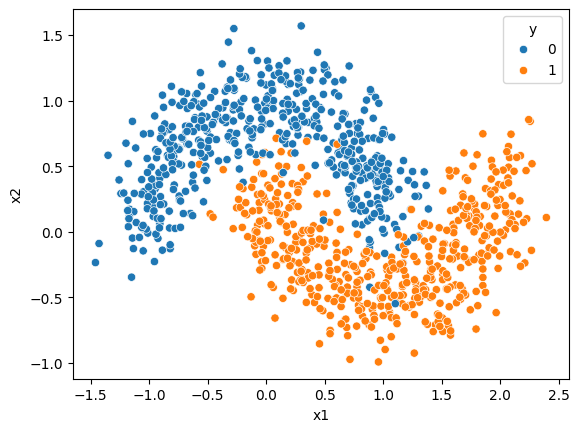

In [5]:
sns.scatterplot(x = "x1",y = "x2",data = dataset,hue="y")

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["y"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [10]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
dt.score(x_train,y_train) , dt.score(x_test,y_test)

(1.0, 0.96)

In [12]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [13]:
sv.score(x_train,y_train) , sv.score(x_test,y_test)

(0.96875, 0.98)

In [14]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [15]:
gnb.score(x_train,y_train) , gnb.score(x_test,y_test)

(0.86125, 0.865)

In [16]:
from sklearn.ensemble import VotingClassifier

In [17]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [18]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [19]:
vc.score(x_train,y_train),vc.score(x_test,y_test)

(0.9725, 0.98)

In [20]:
prd = {"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test)}

In [21]:
pd.DataFrame(prd)

,dt,svm,gnb
0,0,0,1
1,1,1,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
195,0,1,1
196,1,1,1
197,1,1,1
198,1,1,1
